In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [4]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

In [5]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-06,23326.562500,22961.279297,23291.423828,22961.279297,15978259885,22961.279297
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328


In [6]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-06,23326.562500,22961.279297,23291.423828,22961.279297,15978259885,22961.279297
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24126.781250,22773.726562,23126.421875,23963.740234,28639033344,23963.740234


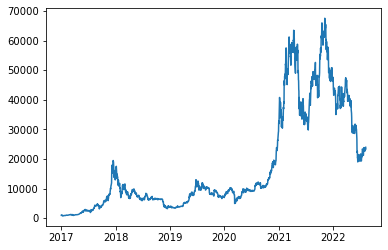

In [7]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

In [8]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2048 entries, 2017-01-01 to 2022-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2048 non-null   float64
 1   Low        2048 non-null   float64
 2   Open       2048 non-null   float64
 3   Close      2048 non-null   float64
 4   Volume     2048 non-null   int64  
 5   Adj Close  2048 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.0 KB


In [9]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-06   -0.014085
2022-08-07    0.009347
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.034511
Name: R, Length: 2048, dtype: float64


In [10]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [11]:
BTC= BTC.dropna()


In [12]:
sumret = BTC["R"].describe()
sumret

count    2047.000000
mean        0.002417
std         0.041379
min        -0.371695
25%        -0.015893
50%         0.002217
75%         0.020937
max         0.252472
Name: R, dtype: float64

In [13]:
BTC[BTC["R"]<-0.15]


,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


In [14]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)


,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


In [15]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015526224995060626
The daily variance of Bitcoin is  0.0017381189977401295
The daily standard deviation (volatility) of Bitcoin return is  0.04169075434362071
The daily median return of Bitcoin is  0.0022150257023572095


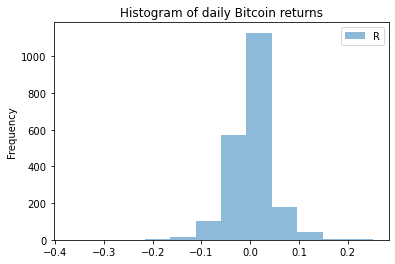

In [36]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin returns")

MY INTERPRETATION OF THIS HISTOGRAM IS THAT BITCOIN TENDS TO HAVE MORE NON-NEGATIVE DAYS, EVEN HAVING MORE LOSS DAYS WHEN THE LOSS IS NOT THAT BIG (COMPARED TO THE DAYS WITH NOT SO BIG EARNING). WHEN THE PERCENT MARGIN GETS BIGGER, ITS MORE PROBABLE THAT WE OBSERVE AN EARNING. 

In [16]:
from matplotlib import pyplot

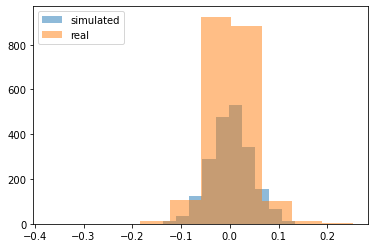

In [35]:
bit_sim = np.random.normal(loc=BTC["r"].mean(), scale = BTC["r"].std(), size= len(BTC.axes[0]))
bit_real= r_bitcoin
bins = 10
pyplot.hist(bit_sim,bins,alpha = 0.5, label='simulated')
pyplot.hist(bit_real,bins,alpha= 0.5, label = 'real')
pyplot.legend(loc="upper left")
pyplot.show()

I CAN OBSERVE A SUBSTANTIAL DIFFERENCE BETWEEN THE SIMULATED AND THE REAL GRAPHIC. THE REAL ONE PRESENTS A MORE UNEQUAL DISTRIBUTION, AND THE SIMULATED ONE PRESENTS A MORE UNIFORM ONE. I THINK THE SIMULATED ONE HAS THIS DISTRIBUTION AS A RESULT OF A NORMAL DISTRIBUTION, WHILE THE REAL DATA OBSERVED TENDS TO STAY IN LOW VALUES.